### Part - A

### 1. Data import and Understanding
- A. Read the ‘Signals.csv’ as DataFrame and import required libraries.
- B. Check for missing values and print percentage for each attribute.
- C. Check for presence of duplicate records in the dataset and impute
  with appropriate method.
- D. Visualise distribution of the target variable.
- E. Share insights from the initial data analysis (at least 2).

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [12]:
!pip install pandas scikit-learn matplotlib seaborn 

ERROR: Could not find a version that satisfies the requirement tensorflow.keras.utils (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.utils


In [8]:
!pip install "keras<2.11"

  Using cached keras-2.10.0-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.10.0 which is incompatible.


In [31]:
import os
os.environ['IF_CPP_MIN_LOG_LEVEL'] = '2'

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
!pip install scikeras
from scikeras.wrappers import KerasClassifier
import random
from tensorflow.keras import backend
from keras.utils import to_categorical
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.1 requires keras<2.11,>=2.10.0, but you have keras 3.5.0 which is incompatible.


In [ ]:
# Read the ‘Signals.csv’ as DataFrame and import required libraries.
Data = pd.read_csv('/content/drive/MyDrive/Great_Lakes_AIML_PG/Intro_NN/project/Signal.csv')

In [ ]:
Data.shape

(1599, 12)

In [ ]:
# Check for missing values and print percentage for each attribute.
Data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
Data.tail()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
round(Data.isnull().sum()/Data.isnull().count()*100,2)

,0
Parameter 1,0.0
Parameter 2,0.0
Parameter 3,0.0
Parameter 4,0.0
Parameter 5,0.0
Parameter 6,0.0
Parameter 7,0.0
Parameter 8,0.0
Parameter 9,0.0
Parameter 10,0.0


- So, no NULL value in the data

In [ ]:
# Check for presence of duplicate records in the dataset and impute with appropriate method.
Data.duplicated().sum()


240

In [ ]:
Data.drop_duplicates(inplace=True)

In [ ]:
Data.shape

(1359, 12)

In [ ]:
Data.duplicated().sum()

0

In [ ]:
# Visualise distribution of the target variable.


# Create a function to display boxplot and histgram
def plot_distribution(df, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex = True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize = figsize,
        dpi = 100
    )

    sns.boxplot(data=df, x=feature, ax=ax_box2, showmeans=True, color='violet')

    sns.histplot(data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette='winter') if bins else \
    sns.histplot(data=df, x=feature, kde=kde, ax=ax_hist2)

    ax_hist2.axvline(df[feature].mean(), color='green', linestyle='--')

    ax_hist2.axvline(df[feature].median(), color='black', linestyle='-')

    plt.show()


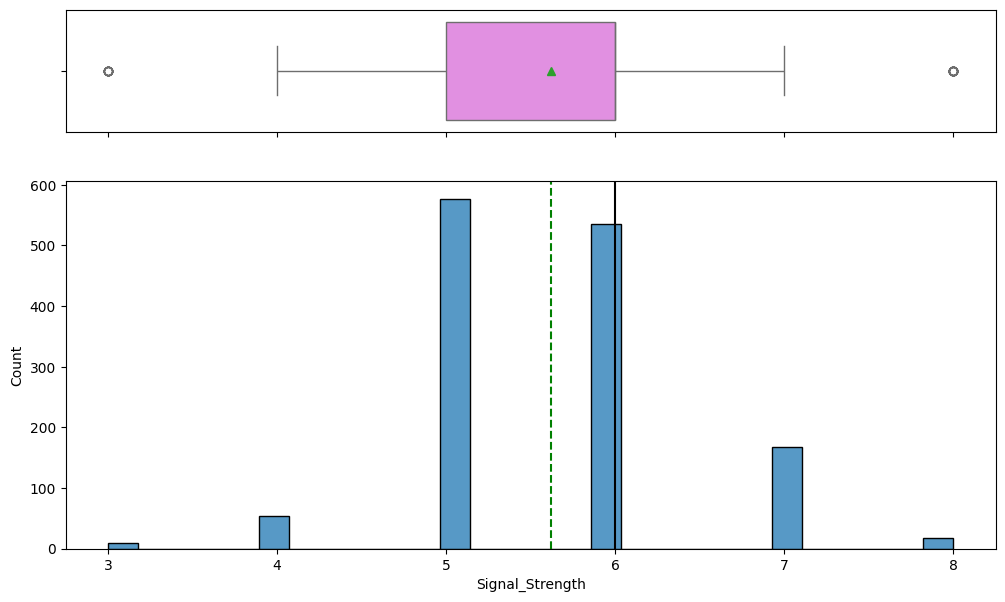

In [ ]:
plot_distribution(Data, 'Signal_Strength')

### Insights from the initial data analysis
- Target variable is almost normalized.
- The mean of the target variable is approx 5.7.
- The median of the target variable is 6.
- Maximum target variable is between 5 to 6.
- Range of target varialbe is from 3 to 8.   

### 2. Data preprocessing
- A. Split the data into X & Y.
- B. Split the data into train & test with 70:30 proportion.
- C. Print shape of all the 4 variables and verify if train and test data is in sync.
- D. Normalise the train and test data with appropriate method.
- E. Transform Labels into format acceptable by Neural Network.

In [ ]:
#  Split the data into X & Y.

X = Data.drop(['Signal_Strength'],axis=1)
y = Data[['Signal_Strength']]

# as we'll need to build classifier, so we'll need convert target variable to categorical variable
Data[['Signal_Strength']].value_counts()

,count
Signal_Strength,
5,577
6,535
7,167
4,53
8,17
3,10


In [ ]:

yc = to_categorical(y, num_classes=9)
yc.shape

(1359, 9)

In [ ]:
# Split the data into train & test with 70:30 proportion.

X_train, X_test, y_train, y_test = train_test_split(X,yc, test_size = 0.3, random_state = 42)



In [ ]:
# Print shape of all the 4 variables and verify if train and test data is in sync.

print("X train:", X_train.shape)
print("X test", X_test.shape)
print("y train", y_train.shape)
print("y test", y_test.shape)

X train: (951, 11)
X test (408, 11)
y train (951, 1)
y test (408, 1)


- The train and test data is in sync.

In [ ]:
# Normalise the train and test data with appropriate method

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_train_X = scaler.fit_transform(X_train)
normalized_test_X = scaler.transform(X_test)

In [ ]:
# Transform Labels into format acceptable by Neural Network

y_train = np.array(y_train)
y_test = np.array(y_test)


### 3. Model Training & Evaluation using Neural Network
- A. Design a Neural Network to train a classifier.
- B. Train the classifier using previously designed Architecture
- C. Plot 2 separate visuals.
    - i. Training Loss and Validation Loss
    - ii. Training Accuracy and Validation Accuracy
- D. Design new architecture/update existing architecture in attempt - to improve the performance of the model.
- E. Plot visuals as in Q3.C and share insights about difference observed in both the models.

In [ ]:
# Design a Neural Network to train a classifier.

backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = Sequential()
model.add(Dense(11, activation='relu'))

model.add(Dense(9, activation='relu'))

model.add(Dense(9, activation='softmax'))


In [ ]:
model.compile(optimizer = 'SGD', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history=model.fit(normalized_train_X, y_train, validation_split=0.2,  epochs=50, batch_size=32, verbose=1)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2017 - loss: 2.1230 - val_accuracy: 0.2723 - val_loss: 2.0739
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3298 - loss: 2.0439 - val_accuracy: 0.3822 - val_loss: 1.9981
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4089 - loss: 1.9698 - val_accuracy: 0.4817 - val_loss: 1.9267
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4865 - loss: 1.9003 - val_accuracy: 0.5079 - val_loss: 1.8596
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5205 - loss: 1.8352 - val_accuracy: 0.5183 - val_loss: 1.7969
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5207 - loss: 1.7742 - val_accuracy: 0.5131 - val_loss: 1.7380
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5289 - loss: 1.7165 - val_accuracy: 0.5236 - val_loss: 1.6821
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5441 - loss: 1.6620 - val_accuracy: 0.5288 - val_loss

In [ ]:
# Saving model for future use

model.save('model_classify.h5')

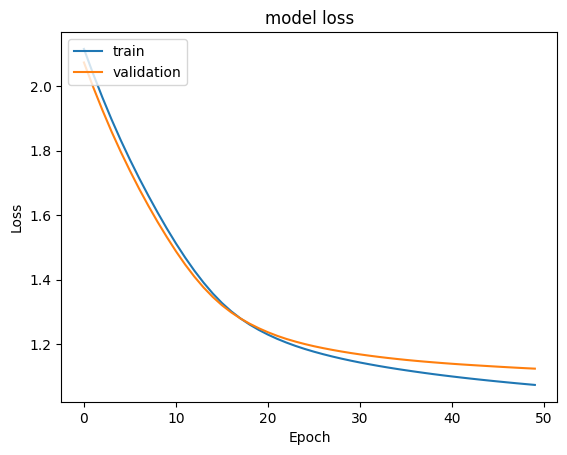

In [ ]:
# Plot visuals for Training Loss and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

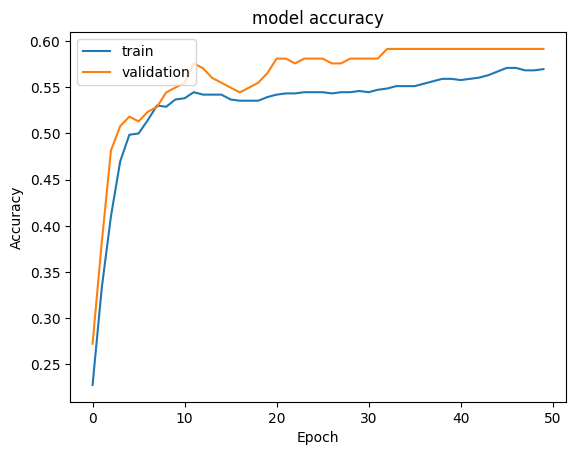

In [ ]:
# Plot visuals for Training Accuracy and Validation Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Design new architecture/update existing architecture in attempt to improve the performance of the model.

model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(11,activation='relu',kernel_initializer='he_uniform',input_dim = normalized_train_X.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(9, activation = 'softmax'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [ ]:
history1 = model1.fit(normalized_train_X,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0711 - loss: 2.6009 - val_accuracy: 0.2880 - val_loss: 1.9846
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3376 - loss: 1.9178 - val_accuracy: 0.3979 - val_loss: 1.6785
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4322 - loss: 1.6541 - val_accuracy: 0.4136 - val_loss: 1.5083
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4572 - loss: 1.5048 - val_accuracy: 0.4293 - val_loss: 1.4121
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4878 - loss: 1.4219 - val_accuracy: 0.4346 - val_loss: 1.3528
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5108 - loss: 1.3708 - val_accuracy: 0.4607 - val_loss: 1.3138
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5179 - loss: 1.3361 - val_accuracy: 0.4712 - val_loss: 1.2860
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5194 - loss: 1.3097 - val_accuracy: 0.4869 - val_loss

In [ ]:
model1.save('model1_classify.h5')

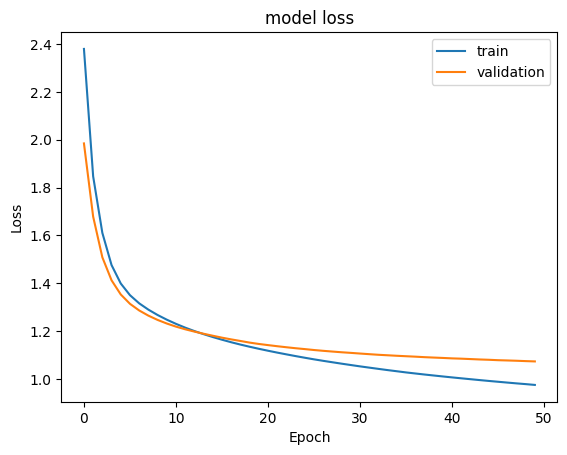

In [ ]:
# Plot visuals for Training Loss and Validation Loss for new model
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

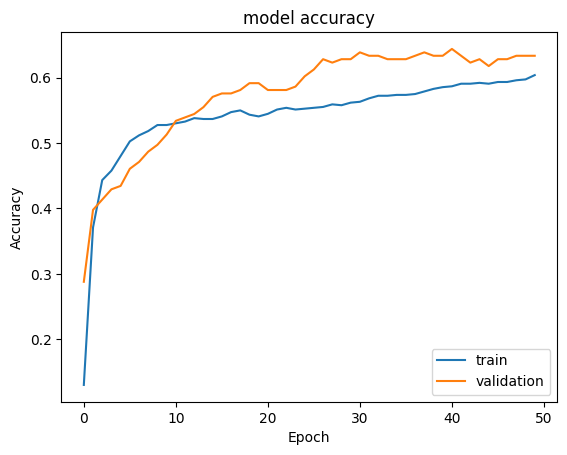

In [ ]:
# Plot visuals for Training Accuracy and Validation Accuracy for new model

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

## PART - B

## 1. Data Import and Exploration
- A. Read the .h5 file and assign to a variable.
- B. Print all the keys from the .h5 file.
- C. Split the data into X_train, X_test, Y_train, Y_test

In [31]:
# A. Read the .h5 file and assign to a variable.

import h5py
h5file = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [32]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Autonomous_Vehicles_SVHN_single_grey1.h5',
 'NN - Problem_Statement-2.pdf',
 'NN Project Data - Signal.csv',
 'NN+FAQ.pdf',
 'NN-+Milestones.pdf',
 'Nural_Networks_project.ipynb',
 'Part-+1%2C2%263+-+Signal.csv',
 'RE-EVALUATION+POLICY.pdf']

In [33]:
# B. Print all the keys from the .h5 file.
h5file.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [34]:
# C. Split the data into X_train, X_test, Y_train, Y_test

X_train = h5file['X_train'][:]
y_train = h5file['y_train'][:]
X_test = h5file['X_test'][:]
y_test = h5file['y_test'][:]
X_val = h5file['X_val'][:]
y_val = h5file['y_val'][:]


h5file.close()

### 2. Data Visualisation and preprocessing
- A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.
- B. Visualise first 10 images in train data and print its corresponding labels.
- C. Reshape all the images with appropriate shape update the data in same variable.
- D. Normalise the images i.e. Normalise the pixel values.
- E. Transform Labels into format acceptable by Neural Network
- F. Print total Number of classes in the Dataset.

In [35]:
# A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.
import numpy as np
print("Training Set:", X_train.shape, y_train.shape)
print("Test Set:", X_test.shape, y_test.shape)
print("Validation Set:", X_val.shape, y_val.shape)


print("Labels in y_train:", np.unique(y_train))
print("Labels in y_test:", np.unique(y_test))
print("Labels in y_val:", np.unique(y_val))

Training Set: (42000, 32, 32) (42000,)
Test Set: (18000, 32, 32) (18000,)
Validation Set: (60000, 32, 32) (60000,)
Labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Labels in y_test: [0 1 2 3 4 5 6 7 8 9]
Labels in y_val: [0 1 2 3 4 5 6 7 8 9]


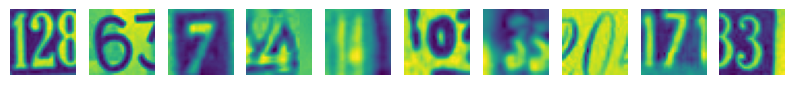

Label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [36]:
# B. Visualise first 10 images in train data and print its corresponding labels.

plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')


plt.show()

print('Label for each of the above image: %s' % (y_train[0:10]))

In [37]:
# C. Reshape all the images with appropriate shape update the data in same variable.

# Reshaping X data into (n, 32, 32)=> (n, 1024)

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)
X_val = X_val.reshape(X_val.shape[0], 1024)


In [38]:
# D. Normalise the images i.e. Normalise the pixel values.

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255



In [39]:
# E. Transform Labels into format acceptable by Neural Network

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)



In [40]:
# F. Print total Number of classes in the Dataset.

print("Total Number of classes:", np.unique(y_train))

Total Number of classes: [0. 1.]


In [41]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 3. Model Training & Evaluation using Neural Network
- A. Design a Neural Network to train a classifier.
- B. Train the classifier using previously designed Architecture (Use best suitable parameters).
- C. Evaluate performance of the model with appropriate metrics.
- D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

In [42]:
# A. Design a Neural Network to train a classifier.

model = Sequential()
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform', input_dim = X_train.shape[1]))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [43]:
# B. Train the classifier using previously designed Architecture (Use best suitable parameters).
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, batch_size=128, verbose=1)

Epoch 1/50
329/329 [==============================] - 3s 6ms/step - loss: 2.2264 - accuracy: 0.1483 - val_loss: 2.0754 - val_accuracy: 0.1925
Epoch 2/50
329/329 [==============================] - 2s 5ms/step - loss: 1.7483 - accuracy: 0.3842 - val_loss: 1.4298 - val_accuracy: 0.5426
Epoch 3/50
329/329 [==============================] - 2s 5ms/step - loss: 1.3487 - accuracy: 0.5597 - val_loss: 1.2625 - val_accuracy: 0.5924
Epoch 4/50
329/329 [==============================] - 2s 5ms/step - loss: 1.2033 - accuracy: 0.6147 - val_loss: 1.3461 - val_accuracy: 0.5611
Epoch 5/50
329/329 [==============================] - 1s 5ms/step - loss: 1.1143 - accuracy: 0.6485 - val_loss: 1.1196 - val_accuracy: 0.6439
Epoch 6/50
329/329 [==============================] - 2s 5ms/step - loss: 1.0402 - accuracy: 0.6745 - val_loss: 0.9761 - val_accuracy: 0.6973
Epoch 7/50
329/329 [==============================] - 2s 5ms/step - loss: 0.9846 - accuracy: 0.6894 - val_loss: 1.0482 - val_accuracy: 0.6683
Epoch 

Score of Loss and Accuracy during Test:

Test loss: 0.6880878806114197
Test accuracy: 0.8021110892295837
563/563 [==============================] - 1s 983us/step
Classification Report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1814
           1       0.84      0.79      0.82      1828
           2       0.80      0.81      0.80      1803
           3       0.77      0.76      0.77      1719
           4       0.84      0.84      0.84      1812
           5       0.75      0.80      0.78      1768
           6       0.74      0.84      0.79      1832
           7       0.81      0.86      0.83      1808
           8       0.79      0.73      0.76      1812
           9       0.83      0.76      0.79      1804

    accuracy                           0.80     18000
   macro avg       0.80      0.80      0.80     18000
weighted avg       0.80      0.

<Axes: >

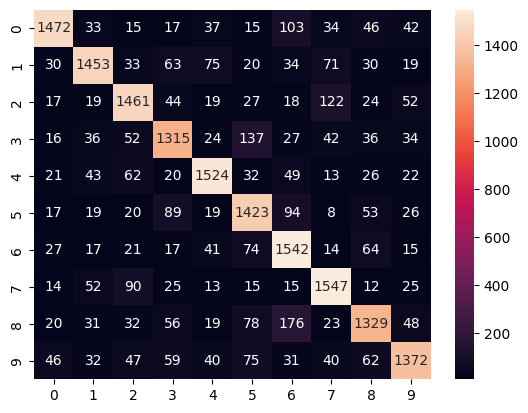

In [44]:
# C. Evaluate performance of the model with appropriate metrics.

from sklearn.metrics import confusion_matrix, classification_report

print("Score of Loss and Accuracy during Test:\n")
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Classification report:

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print('Classification Report'); print('--'*40)
print(classification_report(y_test, y_pred))

#Calculating the confusion matrix


pred_labels = y_pred
true_labels = y_test

cm = confusion_matrix(true_labels, pred_labels)

print("\n\nConfusion metrics on the target variable:\n")

import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')

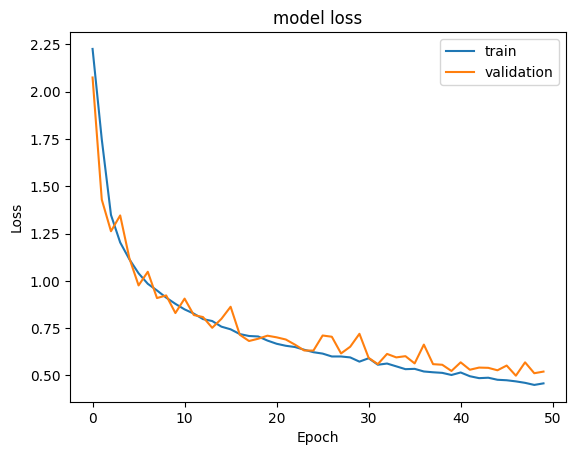

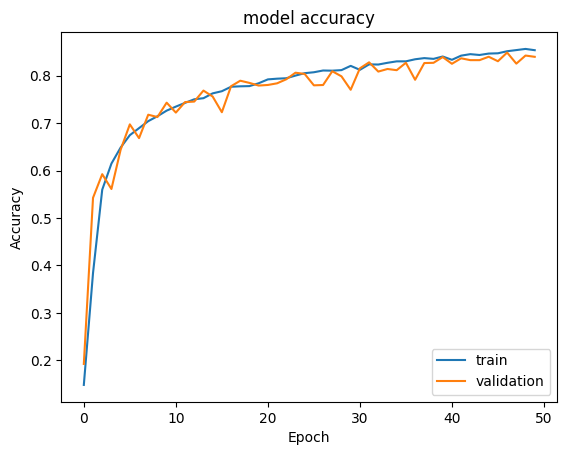

In [45]:
# D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

# Plot visuals for Training Loss and Validation Loss for new model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


# Plot visuals for Training Accuracy and Validation Accuracy for new model
print("\n\n\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

### Observations:
- Model Loss is similer for Training and Validation data around .75, however it seems to increase a bit as it goes further.
- Model Accuracy is similer for Training and Validation data around .80.
- Model Accuracy to label is in the range of 75 to 85.
- Test Loss is .76 and Test Accuracy is .78